In [1]:
import numpy as np 
import pandas as pd 
import os 
train=pd.read_csv("C:\\Users\\baibhagy\\Documents\\loan prediction\\train_ctrUa4K.csv")
test=pd.read_csv("C:\\Users\\baibhagy\\Documents\\loan prediction\\test_lAUu6dG.csv")

In [2]:
print(np.shape(train))
print(np.shape(test))

(614, 13)
(367, 12)


In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['Loan_Status']= label_encoder.fit_transform(train['Loan_Status'])

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 60.1+ KB


In [6]:
train.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [7]:
test.isna().any()

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [8]:
full_data=train.append(test)
np.shape(full_data)

(981, 13)

In [9]:
(full_data.isna().sum())/(981)*100

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
dtype: float64

In [10]:
x=full_data[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y=full_data['Loan_Status']

In [11]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural


In [12]:
x['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [13]:
x['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [14]:
x['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [15]:
x['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [16]:
x['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [17]:
x['Property_Area'].value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [18]:
x['Education'].value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

In [19]:
x.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [20]:
x.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [21]:
# Replacing median with NA for numerical variables 
x['ApplicantIncome'].fillna(x['ApplicantIncome'].median(),inplace=True)
x['CoapplicantIncome'].fillna(x['CoapplicantIncome'].median(),inplace=True)
x['LoanAmount'].fillna(x['LoanAmount'].median(),inplace=True)
x['Loan_Amount_Term'].fillna(x['Loan_Amount_Term'].median(),inplace=True)


C:\Users\baibhagy\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [22]:
# Replacing mode with NA for categorial variables 
cat_var=x[['Gender','Married','Dependents','Self_Employed','Credit_History','Property_Area','Education']]
cat_var

,Gender,Married,Dependents,Self_Employed,Credit_History,Property_Area,Education
0,Male,No,0,No,1.0,Urban,Graduate
1,Male,Yes,1,No,1.0,Rural,Graduate
2,Male,Yes,0,Yes,1.0,Urban,Graduate
3,Male,Yes,0,No,1.0,Urban,Not Graduate
4,Male,No,0,No,1.0,Urban,Graduate
...,...,...,...,...,...,...,...
362,Male,Yes,3+,Yes,1.0,Urban,Not Graduate
363,Male,Yes,0,No,1.0,Urban,Graduate
364,Male,No,0,No,NaN,Semiurban,Graduate
365,Male,Yes,0,No,1.0,Rural,Graduate


In [23]:
cat_var.isna().any()

Gender             True
Married            True
Dependents         True
Self_Employed      True
Credit_History     True
Property_Area     False
Education         False
dtype: bool

In [24]:
# 

In [25]:
for column in cat_var.columns:
    cat_var[column].fillna(cat_var[column].mode()[0], inplace=True)

C:\Users\baibhagy\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [26]:
cat_var.isna().any()

Gender            False
Married           False
Dependents        False
Self_Employed     False
Credit_History    False
Property_Area     False
Education         False
dtype: bool

In [27]:
cat_var['Credit_History']=cat_var['Credit_History'].astype('category')
cat_var_ohe=pd.get_dummies(cat_var)
cat_var_ohe

<ipython-input-27-ad4338f4865b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_var['Credit_History']=cat_var['Credit_History'].astype('category')


,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Education_Graduate,Education_Not Graduate
0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0
1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0
2,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0
3,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1
4,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1
363,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0
364,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0
365,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0


In [28]:
num_var=x[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
num_var

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,126.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
362,4009,1777.0,113.0,360.0
363,4158,709.0,115.0,360.0
364,3250,1993.0,126.0,360.0
365,5000,2393.0,158.0,360.0


the skewness is: 7.086961153594506
the kurtosis is: 71.40205531120817


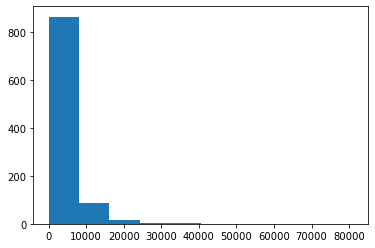

In [29]:
import matplotlib.pyplot as plt
plt.hist(num_var['ApplicantIncome'])
print('the skewness is:',num_var['ApplicantIncome'].skew())
print('the kurtosis is:',num_var['ApplicantIncome'].kurtosis())

In [30]:
num_var.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,981.000000,981.000000
mean,5179.795107,1601.916330,142.057085,342.564730
std,5695.104533,2718.772806,76.395592,64.482011
min,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,101.000000,360.000000
50%,3800.000000,1110.000000,126.000000,360.000000
75%,5516.000000,2365.000000,160.000000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


In [31]:
max_api=5516+(1.5*(5516-2875))
print(max_api)
min_api=2875-(1.5*(5516-2875))
print(min_api)

9477.5
-1086.5


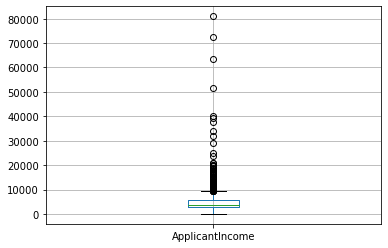

In [32]:
num_var.boxplot(['ApplicantIncome'])

In [33]:
num_var[num_var['ApplicantIncome']>9477.5]=5516
num_var[num_var['ApplicantIncome']<-1086.5] =2874

<ipython-input-33-cda7a7a421eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_var[num_var['ApplicantIncome']>9477.5]=5516
C:\Users\baibhagy\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-33-cda7a7a421eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

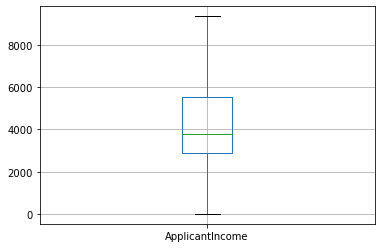

In [34]:
num_var.boxplot(['ApplicantIncome'])

the skewness is: 5.774396383535812
the kurtosis is: 62.83798042635723


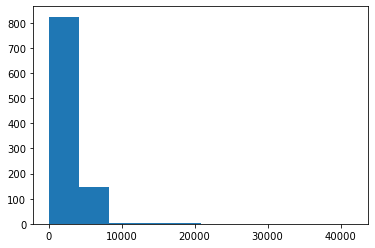

In [35]:
plt.hist(num_var['CoapplicantIncome'])
print('the skewness is:',num_var['CoapplicantIncome'].skew())
print('the kurtosis is:',num_var['CoapplicantIncome'].kurtosis())

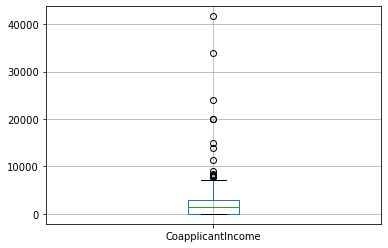

In [36]:
num_var.boxplot(['CoapplicantIncome'])

In [37]:
num_var.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,981.000000,981.000000
mean,4127.097859,1993.599307,592.242610,785.757390
std,1723.952884,2817.952497,1508.385988,1449.583355
min,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,102.000000,360.000000
50%,3800.000000,1560.000000,127.000000,360.000000
75%,5516.000000,2916.000000,170.000000,360.000000
max,9357.000000,41667.000000,5516.000000,5516.000000


In [38]:
max_cai=2916+(1.5*(2916-0))
print(max_cai)
min_cai=0-(1.5*(2916-0))
print(min_cai)

7290.0
-4374.0


In [39]:
num_var[num_var['CoapplicantIncome']>7290]=2916
num_var[num_var['CoapplicantIncome']<-4374]=0

<ipython-input-39-55ea51039fdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_var[num_var['CoapplicantIncome']>7290]=2916
C:\Users\baibhagy\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-39-55ea51039fdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

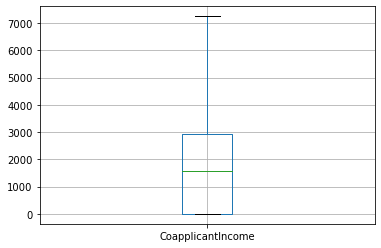

In [40]:
num_var.boxplot('CoapplicantIncome')

the skewness is: 2.7859071190249387
the kurtosis is: 5.923137951569031


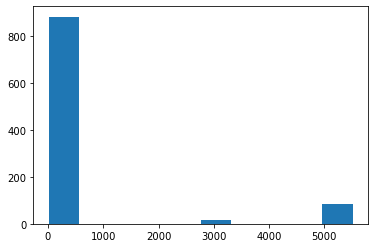

In [41]:
plt.hist(num_var['LoanAmount'])
print('the skewness is:',num_var['LoanAmount'].skew())
print('the kurtosis is:',num_var['LoanAmount'].kurtosis())

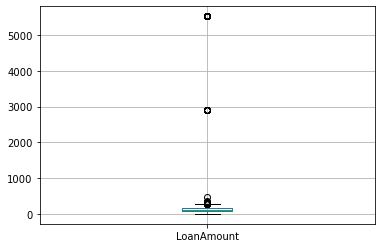

In [42]:
num_var.boxplot('LoanAmount')

In [43]:
num_var.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,981.000000,981.000000
mean,4110.478084,1796.856188,633.550459,825.329256
std,1693.658365,1854.770434,1534.199105,1471.705634
min,0.000000,0.000000,9.000000,6.000000
25%,2896.000000,0.000000,103.000000,360.000000
50%,3765.000000,1560.000000,128.000000,360.000000
75%,5488.000000,2916.000000,172.000000,360.000000
max,9357.000000,7250.000000,5516.000000,5516.000000


In [44]:
max_lm=172+(1.5*(171-103))
print(max_lm)
min_lm=103-(1.5*(171-103))
print(min_lm)

274.0
1.0


In [45]:
num_var[num_var['LoanAmount']>274]=172
num_var[num_var['LoanAmount']<1]=103

<ipython-input-45-a77df99b0bce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_var[num_var['LoanAmount']>274]=172
C:\Users\baibhagy\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-45-a77df99b0bce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

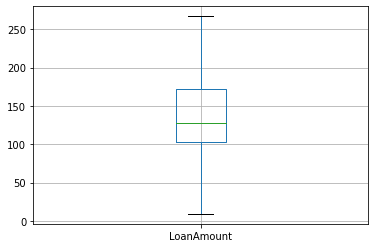

In [46]:
num_var.boxplot('LoanAmount')

the skewness is: -1.3965989267393437
the kurtosis is: 1.0931068040380856


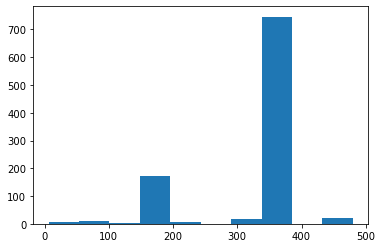

In [47]:
plt.hist(num_var['Loan_Amount_Term'])
print('the skewness is:',num_var['Loan_Amount_Term'].skew())
print('the kurtosis is:',num_var['Loan_Amount_Term'].kurtosis())

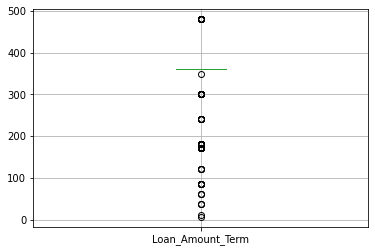

In [48]:
num_var.boxplot('Loan_Amount_Term')

In [49]:
num_var['Loan_Amount_Term'].describe()

count    981.000000
mean     322.899083
std       82.170275
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [50]:
max_lat=360+(1.5*(360-360))
print(max_lat)
min_lat=360-(1.5*(360-360))
print(min_lat)

360.0
360.0


In [51]:
num_var[num_var['Loan_Amount_Term']>360]=360
num_var[num_var['Loan_Amount_Term']<360]=360

<ipython-input-51-0316412f8d72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_var[num_var['Loan_Amount_Term']>360]=360
C:\Users\baibhagy\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-51-0316412f8d72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

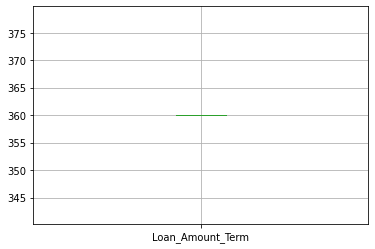

In [52]:
num_var.boxplot('Loan_Amount_Term')

In [53]:
num_var.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,0.060652,-0.579434,NaN
CoapplicantIncome,0.060652,1.000000,-0.201475,NaN
LoanAmount,-0.579434,-0.201475,1.000000,NaN
Loan_Amount_Term,NaN,NaN,NaN,NaN


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = num_var.columns
vif["VIF"] = [variance_inflation_factor(num_var.values, i) for i in range(len(num_var.columns))]
vif

,variables,VIF
0,ApplicantIncome,1.512913
1,CoapplicantIncome,1.047481
2,LoanAmount,1.571123
3,Loan_Amount_Term,15.370974


In [55]:
num_var=num_var[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
num_var

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,126.0
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0
...,...,...,...
362,4009,1777.0,113.0
363,4158,709.0,115.0
364,3250,1993.0,126.0
365,5000,2393.0,158.0


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_var)
scaled_data

array([[ 1.3114365 , -0.84687485, -0.55438802],
       [ 0.7103374 ,  0.26347134, -0.53546081],
       [-0.04127388, -0.84687485, -1.12220453],
       ...,
       [ 0.07742658,  0.6205787 , -0.55438802],
       [ 0.90832976,  0.91510024, -0.25155255],
       [-1.29475068, -0.58180547,  1.66009635]])

In [57]:
num_scaled_data=pd.DataFrame(scaled_data)
num_scaled_data.columns=num_var.columns
num_scaled_data

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,1.311437,-0.846875,-0.554388
1,0.710337,0.263471,-0.535461
2,-0.041274,-0.846875,-1.122205
3,-0.239266,0.889330,-0.611170
4,1.383132,-0.846875,-0.412434
...,...,...,...
976,0.437801,0.461537,-0.677415
977,0.508547,-0.324835,-0.658488
978,0.077427,0.620579,-0.554388
979,0.908330,0.915100,-0.251553


In [58]:
np.shape(num_scaled_data)

(981, 3)

In [59]:
np.shape(cat_var_ohe)

(981, 17)

In [60]:
data_final=num_scaled_data.reset_index(drop=True).merge(cat_var_ohe.reset_index(drop=True), left_index=True, right_index=True)


In [61]:
train['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [62]:
x_train=data_final[0:614]
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Education_Graduate,Education_Not Graduate
0,1.311437,-0.846875,-0.554388,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0
1,0.710337,0.263471,-0.535461,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0
2,-0.041274,-0.846875,-1.122205,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0
3,-0.239266,0.889330,-0.611170,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1
4,1.383132,-0.846875,-0.412434,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.088754,-0.846875,-1.074886,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0
610,-1.294751,-0.581805,1.660096,0,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0
611,2.366921,-0.670162,0.647490,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0
612,2.134743,-0.846875,0.022892,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0


In [63]:
np.shape(x_train)

(614, 20)

In [64]:
y_train=train['Loan_Status']
np.shape(y_train)

(614,)

In [65]:
x_test=data_final[614:981]
x_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Education_Graduate,Education_Not Graduate
614,1.250187,-0.846875,-0.705806,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0
615,-0.005189,0.257581,-0.554388,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0
616,0.908330,0.478472,0.221628,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0
617,-0.354643,1.027755,-0.800442,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0
618,0.089771,-0.846875,-1.008641,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,0.437801,0.461537,-0.677415,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1
977,0.508547,-0.324835,-0.658488,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0
978,0.077427,0.620579,-0.554388,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0
979,0.908330,0.915100,-0.251553,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0


In [66]:
np.shape(x_test)

(367, 20)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
logreg=LogisticRegression()

In [68]:
model=logreg.fit(x_train,y_train)
model

LogisticRegression()

In [69]:
model.coef_

array([[-0.00322512,  0.19515531, -0.20261194,  0.0436943 , -0.04372002,
        -0.2405398 ,  0.24051408, -0.02532524, -0.35807265,  0.27963254,
         0.10373963, -0.04004601,  0.04002029, -1.82835043,  1.82832471,
        -0.41255321,  0.50628864, -0.09376115,  0.16787002, -0.16789574]])

In [70]:
model.intercept_


array([-0.55967664])

In [71]:
train_pred=model.predict(x_train)
train_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [72]:
train_conf=metrics.confusion_matrix(y_train,train_pred)
train_conf

array([[ 83, 109],
       [  8, 414]], dtype=int64)

In [73]:
(414+83)/(83+109+8+414)

0.8094462540716613

In [74]:
test_pred=model.predict(x_test)
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [75]:
# RF 
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [76]:
train_pred_rf=model.predict(x_train)
train_pred_rf

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [77]:
train_conf_rf=metrics.confusion_matrix(y_train,train_pred)
train_conf_rf

array([[ 83, 109],
       [  8, 414]], dtype=int64)

In [78]:
(414+83)/(83+109+8+414)

0.8094462540716613

In [79]:
test_pred_rf=model.predict(x_test)
test_pred_rf

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [84]:
from sklearn.model_selection import cross_val_score
# 5-Fold Cross validation
print(np.mean(cross_val_score(rf, x_train, y_train, cv=5)))

0.2180460806843077


In [85]:
param_grid = {
                 'n_estimators': [5, 10, 15, 20],
                 'max_depth': [2, 5, 7, 9]
             }
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(rf, param_grid, cv=5)
grid_clf.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=1000,
                                             random_state=42),
             param_grid={'max_depth': [2, 5, 7, 9],
                         'n_estimators': [5, 10, 15, 20]})

In [86]:
grid_clf. best_estimator_

RandomForestRegressor(max_depth=2, n_estimators=20, random_state=42)

In [87]:
grid_clf. best_params_
# grid_clf.cv_results_

{'max_depth': 2, 'n_estimators': 20}

In [89]:
from sklearn.ensemble import RandomForestClassifier

classifier_1=RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=20,
                       random_state=42)
classifier_1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=20,
                       random_state=42)

In [92]:
# Predict the test results 
y_pred_1 = classifier_1.predict(x_train)
y_pred_1
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_1))
print(pd.crosstab(y_train, y_pred_1))

              precision    recall  f1-score   support

           0       0.92      0.31      0.46       192
           1       0.76      0.99      0.86       422

    accuracy                           0.78       614
   macro avg       0.84      0.65      0.66       614
weighted avg       0.81      0.78      0.73       614

col_0         0    1
Loan_Status         
0            59  133
1             5  417
